# Clustering
The dating profiles

### Importing Libraries and Data

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook as tqdm

In [3]:
# Loading in the cleaned DF
with open("../profiles.pkl",'rb') as fp:
    df = pickle.load(fp)

# Viewing the DF    
df.tail()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,7,9,0,0,2,2,4
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,4,3,6,3,7,7,2
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,1,4,0,4,9,2,5
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,6,2,0,3,8,9,1
6599,Unapologetic tv aficionado. Devoted twitter enthusiast. Typical coffee guru. Falls down a lot.,2,1,8,7,0,5,5


## Scaling the Categories

In [4]:
# Instantiating the Scaler
scaler = MinMaxScaler()

# Scaling the categories then replacing the old values
df = df[['Bios']].join(pd.DataFrame(scaler.fit_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df.tail()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
6595,Typical pop culture nerd. Infuriatingly humble internet maven. Alcohol evangelist.,0.777778,1.000000,0.000000,0.000000,0.222222,0.222222,0.444444
6596,Avid web junkie. Lifelong alcohol guru. Hardcore reader. Award-winning twitter evangelist.,0.444444,0.333333,0.666667,0.333333,0.777778,0.777778,0.222222
6597,Music ninja. Bacon fanatic. Reader. Total communicator. Unapologetic beer specialist.,0.111111,0.444444,0.000000,0.444444,1.000000,0.222222,0.555556
6598,Communicator. Bacon lover. Award-winning introvert. Amateur internet ninja.,0.666667,0.222222,0.000000,0.333333,0.888889,1.000000,0.111111
6599,Unapologetic tv aficionado. Devoted twitter enthusiast. Typical coffee guru. Falls down a lot.,0.222222,0.111111,0.888889,0.777778,0.000000,0.555556,0.555556


## Vectorizing the Bios

In [5]:
# Instantiating the Vectorizer
vectorizer = CountVectorizer()

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(df['Bios'])

In [6]:
# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_wrds.head()

/Users/abhinavrawal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,animals,apathy,avid,award,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
new_df.head()

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,unable,unapologetic,wannabe,web,webaholic,winning,with,writer,zombie,zombieaholic
0,0.555556,0.333333,0.444444,0.111111,0.333333,0.666667,0.777778,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.777778,1.000000,0.555556,0.111111,1.000000,0.444444,0.000000,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0.111111,0.222222,0.666667,0.555556,0.666667,0.555556,0.444444,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0.555556,0.222222,0.777778,0.888889,0.222222,0.666667,0.666667,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.666667,0.666667,0.666667,0.444444,0.333333,0.666667,0.333333,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Performing PCA on the DF
Reducing the dimensionality of the dataset with Principal Component Analysis

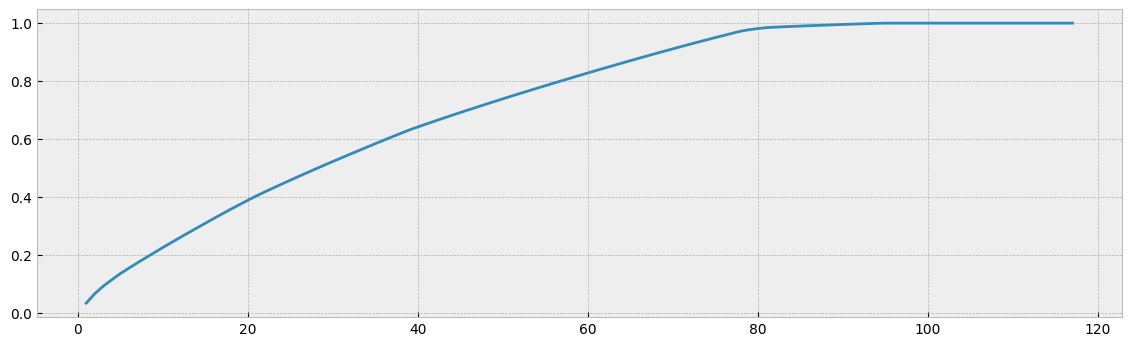

Number features: 85
Total Variance Explained: 0.9910536253090321


In [8]:
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,new_df.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 99% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_99 = len(total_explained_variance[total_explained_variance>=.99])
n_to_reach_99 = new_df.shape[1] - n_over_99

print(f"Number features: {n_to_reach_99}\nTotal Variance Explained: {total_explained_variance[n_to_reach_99]}")

In [9]:
# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_99)

# Fitting and transforming the dataset to the stated number of features
df_pca = pca.fit_transform(new_df)

# Seeing the variance ratio that still remains after the dataset has been reduced
pca.explained_variance_ratio_.cumsum()[-1]

0.9898749722757191

## Hierarchical Agglomerative Clustering

### Finding the Optimum Number of Clusters

In [11]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
ch_scores = []

s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in tqdm(cluster_cnt):
    
    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    # Appending the scores to the empty lists
    ch_scores.append(calinski_harabasz_score(df_pca, cluster_assignments))
    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

/var/folders/nl/vpn51pd91s757p5fhr4m2j3r0000gn/T/ipykernel_4014/3591206986.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(cluster_cnt):


  0%|          | 0/18 [00:00<?, ?it/s]

### Plotting the Evaluation Scores for Different Evaluation Metrics

In [12]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()

### Calinski-Harabasz
A higher scores means better defined clusters.  Aiming for a high score

Max Value:
Cluster #    Cluster Score
2     119.088724

Min Value:
Cluster #     Cluster Score
19      57.661027


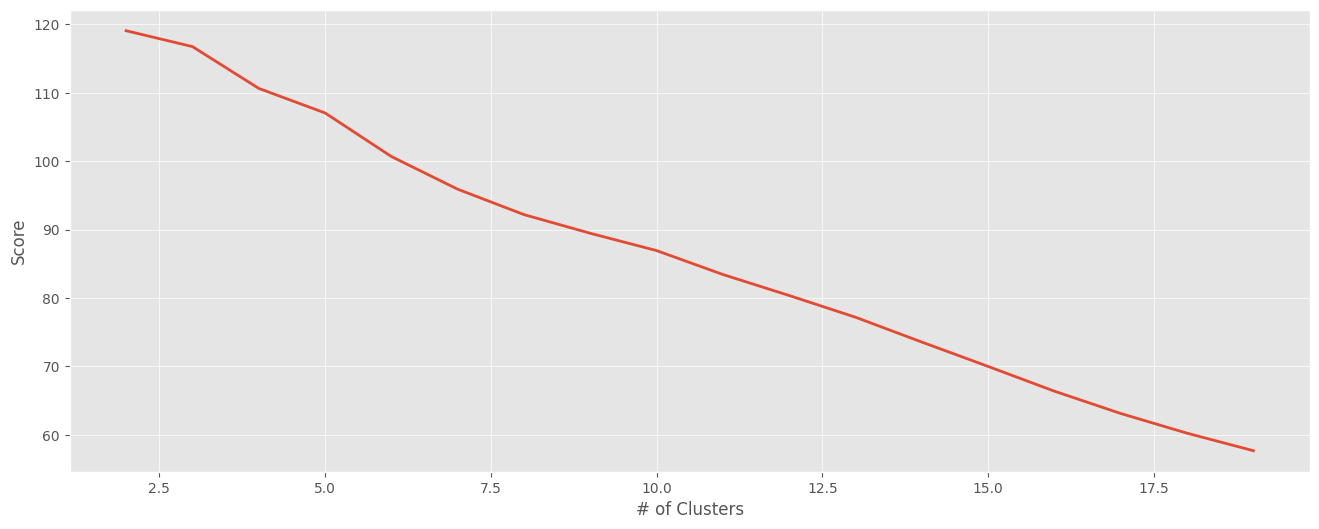

In [13]:
plot_evaluation(ch_scores)

### Silhouette Coefficient
A higher score means better defined clusters. Aim for high score.

Max Value:
Cluster #     Cluster Score
12       0.031083

Min Value:
Cluster #    Cluster Score
2       0.016023


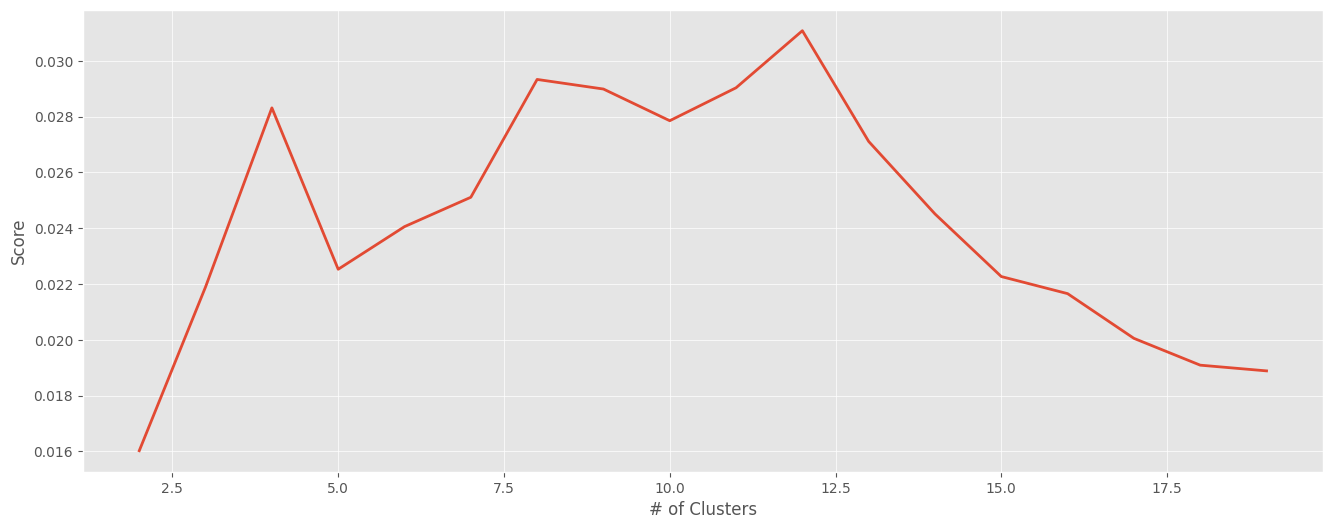

In [14]:
plot_evaluation(s_scores)

### Davies-Bouldin
A lower score is better.  Scores closer to zero are better.

Max Value:
Cluster #    Cluster Score
2        5.34173

Min Value:
Cluster #     Cluster Score
12       3.997348


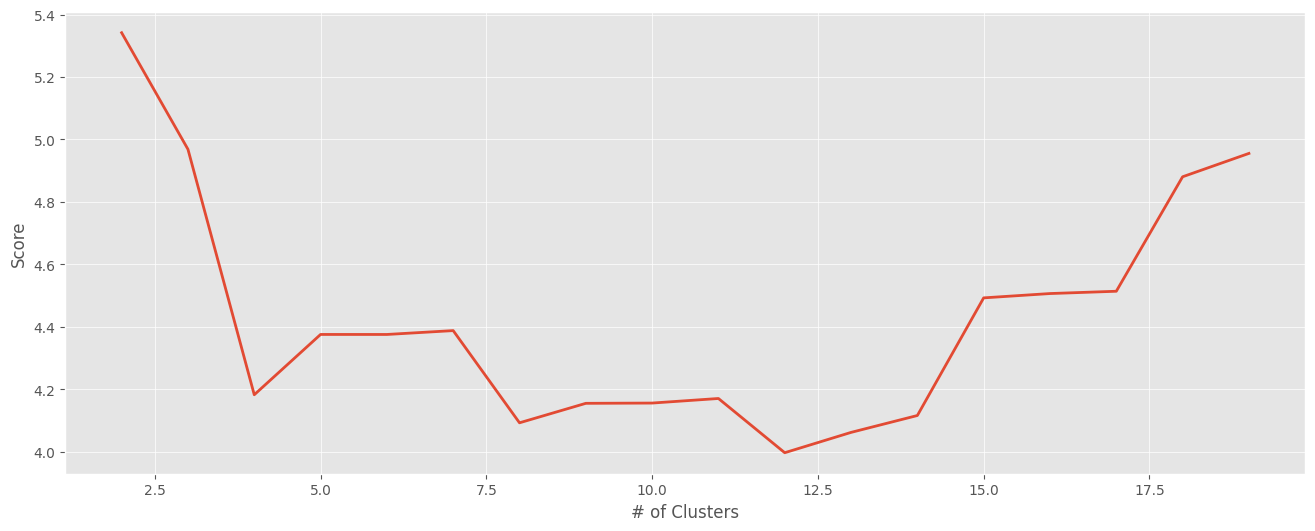

In [15]:
plot_evaluation(db_scores)

Based on two evaluation metrics, the best amount of clusters for this dataset is 12.

## Running the Final Clustering Algorithm

In [16]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=12)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

In [17]:
# Unscaling the categories then replacing the scaled values
df = df[['Bios']].join(pd.DataFrame(scaler.inverse_transform(df.drop('Bios', axis=1)), columns=df.columns[1:], index=df.index))
df.head()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0


In [18]:
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df.head()

,Bios,Movies,TV,Religion,Music,Sports,Books,Politics,Cluster #
0,Typical twitter fanatic. Infuriatingly humble thinker. Lifelong coffee practitioner. Organizer.,5.0,3.0,4.0,1.0,3.0,6.0,7.0,9
1,Web junkie. Analyst. Infuriatingly humble introvert. Food nerd. Lifelong music fanatic. Coffee lover.,7.0,9.0,5.0,1.0,9.0,4.0,0.0,9
2,Avid web maven. Food practitioner. Gamer. Twitter fanatic. Pop culture scholar. Zombie evangelist.,1.0,2.0,6.0,5.0,6.0,5.0,4.0,1
3,Twitteraholic. Extreme web fanatic. Food buff. Infuriatingly humble entrepreneur.,5.0,2.0,7.0,8.0,2.0,6.0,6.0,9
4,Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.,6.0,6.0,6.0,4.0,3.0,6.0,3.0,10


### Exporting the Clustered Profiles

In [19]:
with open("../clustered_profiles.pkl", "wb") as fp:
    pickle.dump(df, fp)

## Finding Users within their own Clusters
Sorting users so they match or are recommended to other similar users.

Example will be randomly using any of the clusters:

In [20]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

print("For Cluster Group #", rand_cluster)

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

# Viewing the newly created DF
group

For Cluster Group # 0


,Bios,Movies,TV,Religion,Music,Sports,Books,Politics
8,Lifelong introvert. General travel maven. Hipster-friendly web trailblazer. Writer. Alcohol fan. Student. Communicator. Coffee guru.,8.0,8.0,2.0,6.0,1.0,2.0,9.0
10,Tv specialist. Professional coffee scholar. Introvert. Thinker. Creator. Travel advocate.,9.0,2.0,3.0,4.0,4.0,9.0,4.0
12,Coffeeaholic. Entrepreneur. Explorer. Internet maven. Twitter evangelist. Alcohol geek.,1.0,6.0,4.0,4.0,0.0,1.0,3.0
13,Pop culture trailblazer. Zombie nerd. Travel specialist. Foodaholic. Total student. Twitter buff.,2.0,2.0,2.0,1.0,2.0,4.0,7.0
25,Bacon geek. Freelance food aficionado. Devoted internet fanatic. Explorer. Friendly music trailblazer. Incurable beer buff.,0.0,1.0,4.0,1.0,5.0,7.0,3.0
...,...,...,...,...,...,...,...,...
6584,Total troublemaker. Bacon ninja. Hipster-friendly zombie evangelist. Writer. Internet trailblazer.,4.0,0.0,8.0,7.0,5.0,6.0,7.0
6587,Web scholar. Certified food fanatic. Internet expert. Friendly thinker. Unapologetic tv enthusiast.,2.0,8.0,4.0,5.0,1.0,2.0,2.0
6588,Hardcore tv geek. Typical music buff. Hipster-friendly beer enthusiast.,3.0,2.0,8.0,5.0,2.0,2.0,6.0
6590,Unapologetic thinker. Certified beer trailblazer. Amateur twitter guru. Hardcore travel nerd.,5.0,6.0,3.0,1.0,6.0,9.0,4.0


### Vectorizing the Bios only in the Selected Cluster

In [21]:
# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['Bios'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names())
cluster_v

/Users/abhinavrawal/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,advocate,aficionado,alcohol,alcoholaholic,amateur,analyst,apathy,avid,award,bacon,...,twitteraholic,typical,unapologetic,wannabe,web,webaholic,winning,writer,zombie,zombieaholic
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
10,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6584,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
6587,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6588,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6590,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [22]:
# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('Bios', axis=1, inplace=True)

# Viewing the new DF
group.head()

,Movies,TV,Religion,Music,Sports,Books,Politics,advocate,aficionado,alcohol,...,twitteraholic,typical,unapologetic,wannabe,web,webaholic,winning,writer,zombie,zombieaholic
8,8.0,8.0,2.0,6.0,1.0,2.0,9.0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
10,9.0,2.0,3.0,4.0,4.0,9.0,4.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1.0,6.0,4.0,4.0,0.0,1.0,3.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,2.0,2.0,2.0,1.0,2.0,4.0,7.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,0.0,1.0,4.0,1.0,5.0,7.0,3.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Finding Correlation among the Users

In [24]:
# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()

corr_group.head()

,8,10,12,13,25,28,29,30,31,33,...,6574,6575,6578,6579,6583,6584,6587,6588,6590,6597
8,1.000000,0.686768,0.750295,0.713001,0.329966,0.710161,0.565849,0.502491,0.514414,0.683308,...,0.590819,0.575603,0.854589,0.835716,0.666640,0.637537,0.739144,0.693901,0.644599,0.569826
10,0.686768,1.000000,0.443517,0.688632,0.656522,0.681869,0.713806,0.598483,0.724386,0.769039,...,0.798096,0.389800,0.637802,0.571653,0.586219,0.768046,0.528297,0.630209,0.849782,0.536222
12,0.750295,0.443517,1.000000,0.529049,0.389224,0.778169,0.517073,0.645757,0.650781,0.506740,...,0.597034,0.823300,0.646314,0.635846,0.738877,0.592854,0.877656,0.728228,0.534908,0.457481
13,0.713001,0.688632,0.529049,1.000000,0.654190,0.627588,0.793937,0.695207,0.584189,0.444300,...,0.752347,0.320814,0.560144,0.709061,0.758258,0.739302,0.463956,0.680733,0.742814,0.608936
25,0.329966,0.656522,0.389224,0.654190,1.000000,0.659891,0.751698,0.753132,0.782942,0.329242,...,0.844060,0.324410,0.344353,0.364106,0.690814,0.745727,0.415241,0.602116,0.776965,0.612417


## Finding the Top 10 Similar users
For a random dating profile

In [25]:
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 3677 

          3677
2857  0.945705
2467  0.935739
3110  0.934075
1782  0.929993
3491  0.926169
4333  0.923850
1277  0.922060
4132  0.920514
987   0.920127
5667  0.920100

The most similar user to User # 3677 is User # 2857
